In [21]:
import json
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold 
import pandas as pd
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# load json: modify the path to your own ‘train.json’ file
my_annotation = '/opt/ml/my_proj/data/annotations/train.json'

with open(my_annotation) as f: 
    my_data = json.load(f)

for obj_id in range(10):
    print(my_data['annotations'][obj_id]['category_id'])

0
3
7
4
5
5
0
7
0
3


In [2]:
# 이미지 복사해서 my_proj1/data/images로 옮기는 코드 

import os 
import shutil 

src_path = '/opt/ml/dataset/train'
dst_path = '/opt/ml/my_proj1/data/images'

for filename in os.listdir(src_path): 
    if filename.startswith('.'): 
        continue 
    source = os.path.join(src_path, filename)
    shutil.copy(source, dst_path) 

In [25]:
import json
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold 
import pandas as pd
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# load json: modify the path to your own ‘train.json’ file
annotation = '/opt/ml/dataset/train.json'

with open(annotation) as f: 
    data = json.load(f)

var = [(ann['image_id'], ann['category_id']) for ann in data['annotations']]
X_ = np.ones((len(data['annotations']),1))  # 데이터 (객체)
y_ = np.array([v[1] for v in var])  # 클래스 아이디 
groups_ = np.array([v[0] for v in var])  # 그룹 (이미지 아이디)

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=411)

for train_idx, val_idx in cv.split(X_, y_, groups_):  # 객체_id, 클래스_id, 이미지_id
    print("TRAIN:")
    print(len(groups_[train_idx]), groups_[train_idx])
    print(len(y_[train_idx]), y_[train_idx])
    print("TEST:")
    print(len(groups_[val_idx]), groups_[val_idx])
    print(len(y_[val_idx]), y_[val_idx])

TRAIN:
18633 [   0    1    1    1    1    1    1    1    1    2    3    3    4    4    4    4    4    4    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    7    7    8    8    8    8    8    8    8    9   10   11   12   12   12   14   14   14   14   14   15   15   15   16   18   18   18   18   18   18   18   18   18   18   18   19   19   19   19   19   19   19   19   19   19   20   21   21   21   21   21   21   21   21   21   21   22   22   23   24   25   26   26   28   28   28   28   30   31   31   31   32   32   32   32   32   32   32   32   32   32   32   32   32   32   33   33   34   35   36   36   36   37   38   38   38   38   38   38   38   38   38   38   38   38   38   38   39   40   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   42   43   43   43   44   44   44   45   45   45   45   45   45   45   45   45   45   45   45   45   45   45   45   45   45   45   47  

In [27]:
import pandas as pd
from collections import Counter

def get_distribution(y):
    y_distr = Counter(y)
    y_vals_sum = sum(y_distr.values())

    return [f'{y_distr[i]/y_vals_sum:.2%}' for i in range(np.max(y) +1)]

distrs = [get_distribution(y_)]
index = ['training set']

for fold_ind, (train_idx, val_idx) in enumerate(cv.split(X_,y_, groups_)):  # 분포를 맞춘 객체 아이디 리스트
    train_y, val_y = y_[train_idx], y_[val_idx]  # 클래스 아이디 
    train_gr, val_gr = groups_[train_idx], groups_[val_idx]  # 이미지 아이디 

    assert len(set(train_gr) & set(val_gr)) == 0 

    distrs.append(get_distribution(train_y))

    train_image_names = [] 
    val_image_names = [] 
    for i in set(train_gr): 
        name = str(i).zfill(4) 
        train_image_names.append(name) 
    for i in set(val_gr): 
        name = str(i).zfill(4) 
        val_image_names.append(name)  

    pd.Series(train_image_names).to_csv(f'../data/train{fold_ind}.txt', sep=' ', header=False, index=False)
    pd.Series(val_image_names).to_csv(f'../data/val{fold_ind}.txt', sep=' ', header=False, index=False)  

    distrs.append(get_distribution(val_y))
    index.append(f'train - fold{fold_ind}')
    index.append(f'val - fold{fold_ind}')
    print('-------------------------------------------------------')
    print(set(train_gr))
    print(len(set(train_gr)), len(set(val_gr)))
    print('-------------------------------------------------------')


categories = [d['name'] for d in data['categories']]
pd.DataFrame(distrs, index=index, columns = [categories[i] for i in range(np.max(y_) + 1)])

-------------------------------------------------------
{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 70, 71, 72, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 181, 182, 183, 184, 185, 186, 187, 188, 191, 192, 193, 194, 195, 196, 197, 199, 201, 203, 205, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251,

,General trash,Paper,Paper pack,Metal,Glass,Plastic,Styrofoam,Plastic bag,Battery,Clothing
training set,17.14%,27.45%,3.88%,4.04%,4.24%,12.72%,5.46%,22.37%,0.69%,2.02%
train - fold0,16.96%,27.45%,3.79%,4.13%,4.48%,12.61%,5.51%,22.28%,0.77%,2.02%
val - fold0,17.85%,27.42%,4.23%,3.70%,3.26%,13.15%,5.25%,22.77%,0.35%,2.02%
train - fold1,17.14%,27.24%,4.01%,3.98%,4.28%,12.77%,5.38%,22.32%,0.67%,2.20%
val - fold1,17.12%,28.17%,3.41%,4.26%,4.12%,12.51%,5.72%,22.57%,0.73%,1.38%
train - fold2,17.31%,27.39%,3.83%,4.08%,4.13%,12.80%,5.14%,22.68%,0.69%,1.94%
val - fold2,16.42%,27.68%,4.05%,3.88%,4.70%,12.36%,6.76%,21.12%,0.69%,2.35%
train - fold3,17.30%,27.47%,3.87%,4.06%,4.22%,12.63%,5.49%,22.39%,0.63%,1.95%
val - fold3,16.50%,27.36%,3.88%,3.99%,4.33%,13.07%,5.33%,22.30%,0.92%,2.32%
train - fold4,16.97%,27.67%,3.88%,3.97%,4.10%,12.77%,5.76%,22.20%,0.68%,2.00%


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
['0000', '0001', '0002', '0003', '0004']


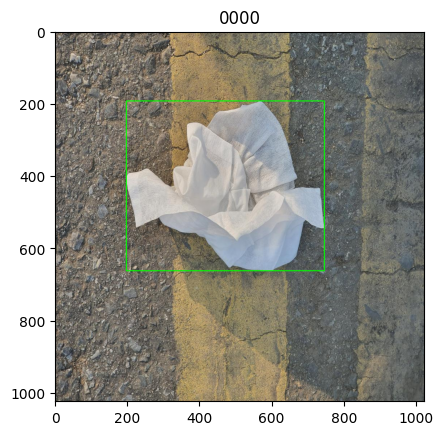

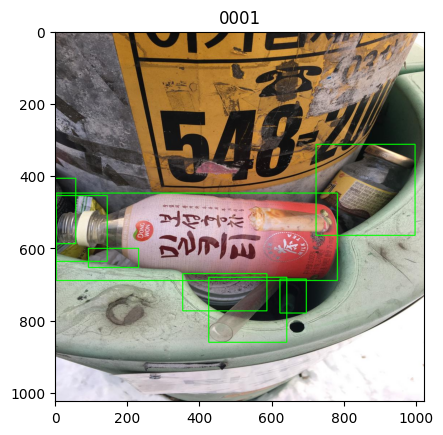

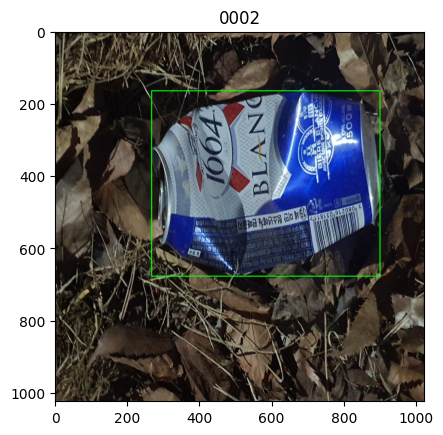

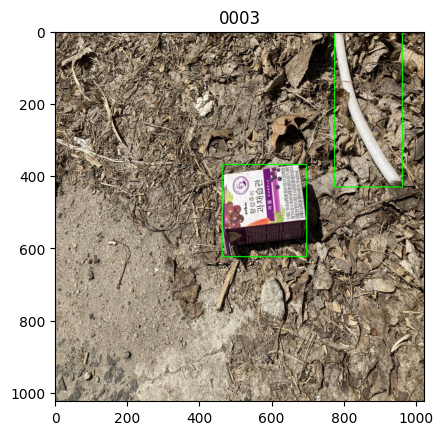

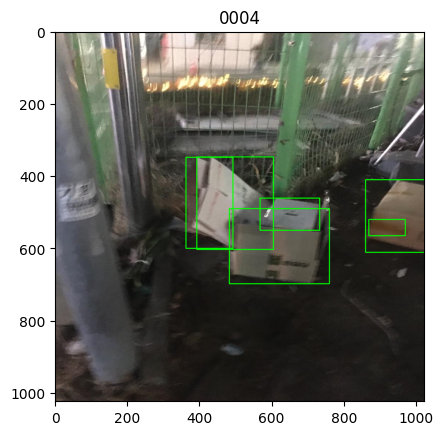

In [19]:
import mmcv
from pycocotools.coco import COCO
import matplotlib.pyplot as plt 
import cv2  


coco = COCO('/opt/ml/my_proj1/data/annotations/train.json')
coco

# image_ids = coco.getImgIds()
# ann_ids = coco.getAnnIds(imgIds=image_ids)


def show_image_and_bbox(image_name): 
    bbox_color = (0, 255, 0)
    text_color = (0, 0, 255)

    # 이미지 이름과 id는 1 대 1 매핑 
    image_id_from_name = 0 if image_name.replace('0', '') == '' else int(image_name.replace('0', '')) 
    image_path = f'/opt/ml/my_proj1/data/images/{image_name}.jpg'

    ann_ids = coco.getAnnIds(image_id_from_name)  
    anns = coco.loadAnns(ann_ids) 

    draw_img = cv2.imread(image_path)

    for ann in anns: 
        bbox = ann['bbox'] 
        
        x = int(bbox[0])
        y = int(bbox[1])
        x_ = int(bbox[0] + bbox[2])
        y_ = int(bbox[1] + bbox[3]) 

        cv2.rectangle(draw_img, (x, y), (x_, y_), color=bbox_color, thickness=2)
        # cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)

    plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    plt.title(image_name)


# train0.txt 에서 이미지 이름 가져오기 
image_list = mmcv.list_from_file('/opt/ml/my_proj1/data/train0.txt')

image_names = []
for i, image_name in enumerate(image_list):
    if i == 5: # 5개만 출력 
        break 
    fig = plt.figure() 
    image_names.append(image_name) 
    show_image_and_bbox(image_name) 
    
print(image_names)